# Generating Sets of Responsive Images

Here we have three responsive-image information designs:

- Gallery Image Strategy
- Hero Image (and Portrait Hero Image) Strategy
- Index Background Strategy

In [1]:
from IPython import display
from IPython.core.interactiveshell import InteractiveShell
from wand.color import Color
from wand.drawing import Drawing
from wand.image import Image

InteractiveShell.ast_node_interactivity = 'all'

background_color_code = '#ff8c00' # DarkOrange https://en.wikipedia.org/wiki/Web_colors
text_color_code = '#fff'
font_location = './fonts/ickyticket-mono-font/IckyticketMono-nKpJ.ttf'

def render_and_save_original(w, h, output_filename):
    with Color(background_color_code) as background_color:
        with Image(width=w, height=h, background=background_color) as img:
            img.save(filename=output_filename)

w, h = 1080, 1920
output_filename = f'original_portrait_{w}x{h}.png'

render_and_save_original(w, h, output_filename)

w, h = 1920, 1080
output_filename = f'original_1080p_{w}x{h}.png'

render_and_save_original(w, h, output_filename)

## the shared render function

In [2]:
def draw_caption_render_and_save(
        w, h, font_size, original_image_path,
        output_path, output_filename, output_width=800,
        manipulate_clone=None,
        text_coordinates=lambda w, h, text_width: (w - text_width - int(w/6), h - int(h/4))):
    with Color(text_color_code) as text_color:
        with Drawing() as draw:
            draw.fill_color = text_color
            draw.font = font_location
            draw.font_size = font_size

            with Image(filename=original_image_path) as original:
                with original.clone() as clone:
                    font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                    text_width = int(font_metrics.text_width)
                    x, y = text_coordinates(w, h, text_width)

                    if manipulate_clone is not None:
                        manipulate_clone(clone, w, h)

                    draw.text(x, y, output_filename)
                    draw(clone)
                    clone.save(filename=output_path)

    return display.Image(filename=output_path, width=output_width)


## Gallery Image Strategy

The design goal of the ‘gallery’ image is the desire to display an image at a _maximum_ resolution, full-screen, landscape orientation. This desire could be satisfied in a full-screen hero image layout or the typical gallery presentation.

We start with a Full HD (1080p) image: `1920x1080`

From the starting image we generate the following:

| name | size | operation
|- |- |-
| `gallery-720p` | `1280x720` | resize
| `gallery-sd` | `640x480` | crop 720p
| `gallery-thumb` | `120x120` | crop SD

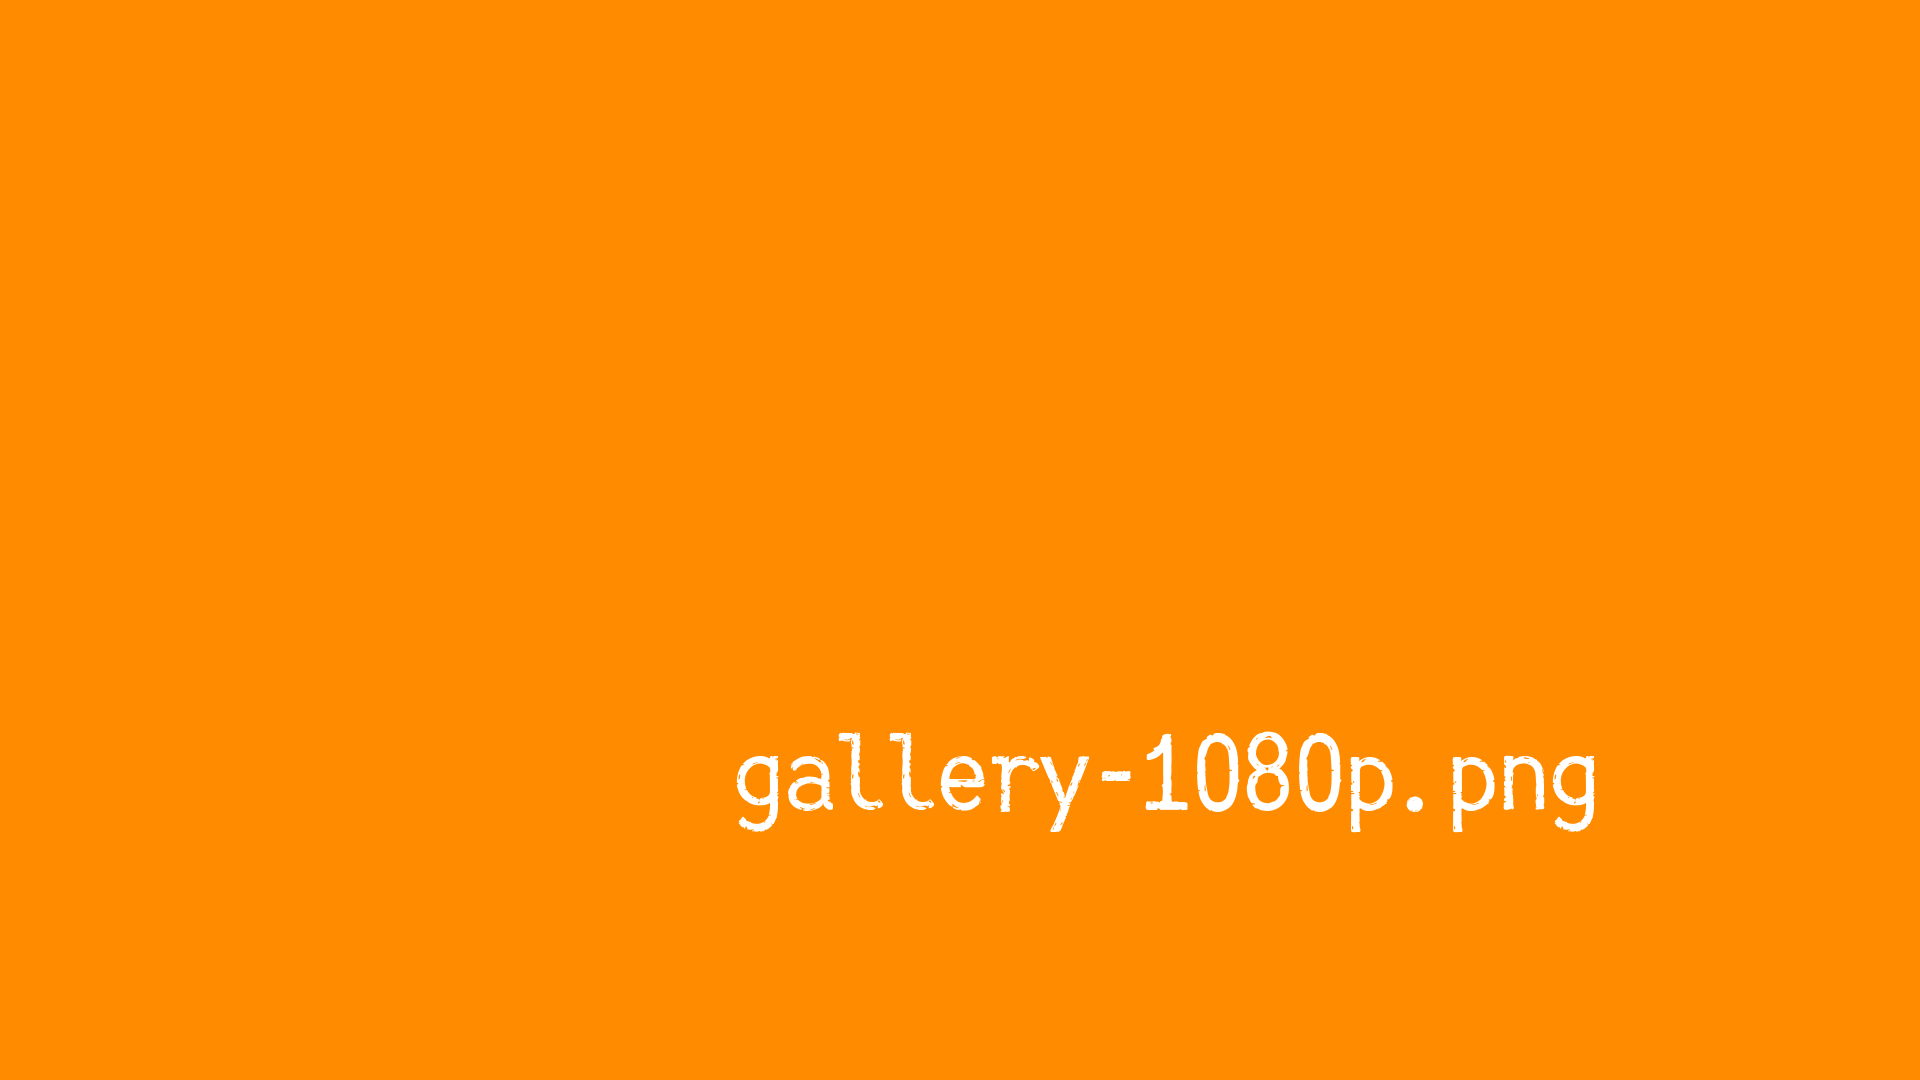

In [3]:
output_filename = 'gallery-1080p.png'
output_path = f'./gallery/{output_filename}'

draw_caption_render_and_save(w=1920, h=1080,
    font_size=108,
    original_image_path='./original_1080p_1920x1080.png',
    output_path=output_path, output_filename=output_filename)

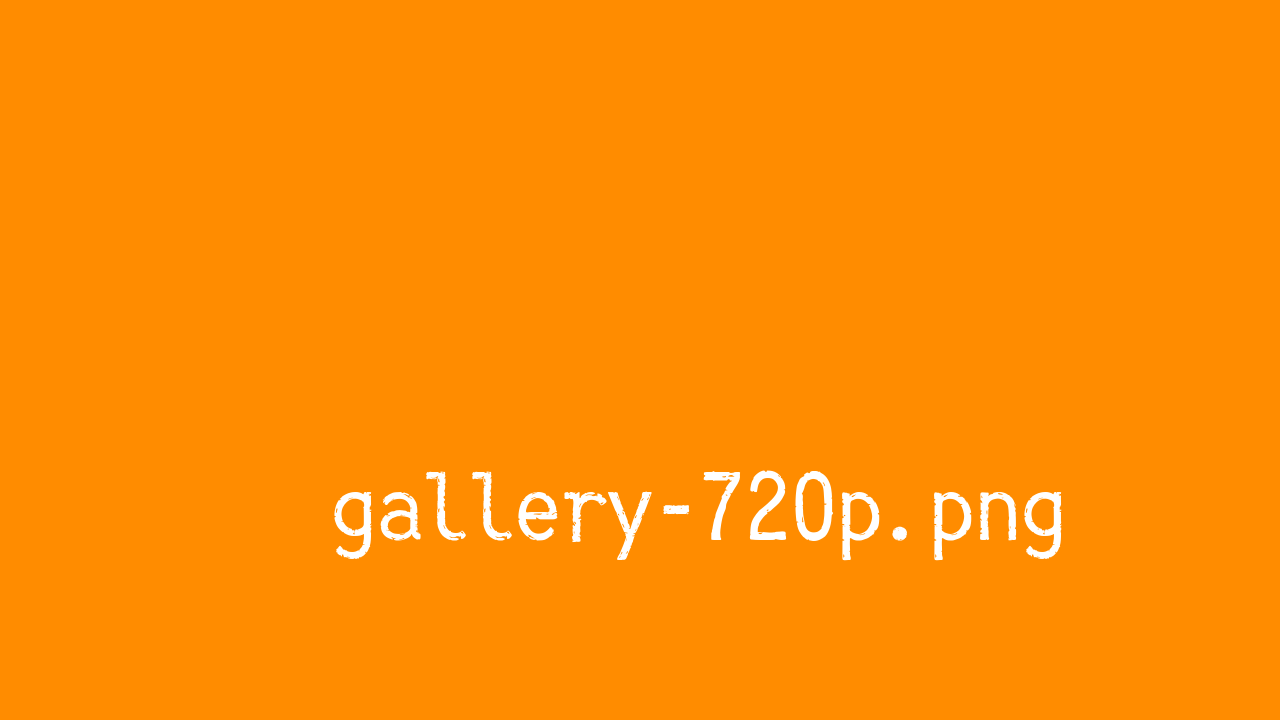

In [4]:
output_filename = 'gallery-720p.png'
output_path = f'./gallery/{output_filename}'

draw_caption_render_and_save(w=1280, h=720,
    font_size=96,
    original_image_path='./original_1080p_1920x1080.png',
    output_path=output_path, output_filename=output_filename,
    manipulate_clone=lambda clone, w, h: clone.resize(w, h))

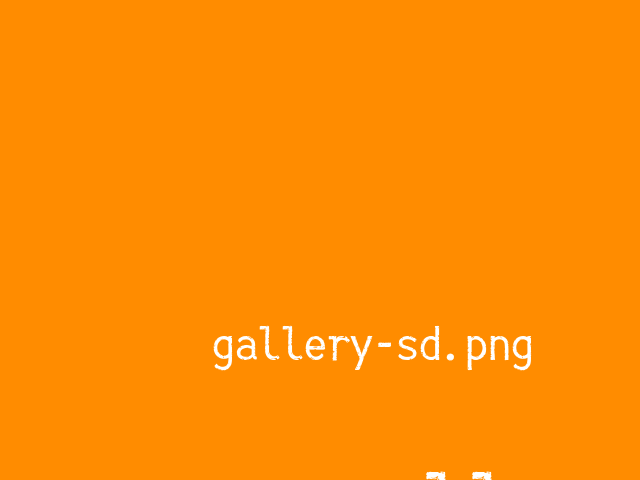

In [5]:
output_filename = 'gallery-sd.png'
output_path = f'./gallery/{output_filename}'

draw_caption_render_and_save(w=640, h=480,
    font_size=48,
    original_image_path='./gallery/gallery-720p.png',
    output_path=output_path, output_filename=output_filename, output_width=640,
    manipulate_clone=lambda clone, w, h: clone.crop(left=0, top=0, right=w, bottom=h))

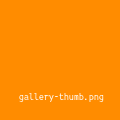

In [6]:
output_filename = 'gallery-thumb.png'
output_path = f'./gallery/{output_filename}'

draw_caption_render_and_save(w=120, h=120,
    font_size=10,
    original_image_path='./gallery/gallery-sd.png',
    output_path=output_path, output_filename=output_filename, output_width=120,
    manipulate_clone=lambda clone, w, h: clone.crop(left=0, top=0, right=w, bottom=h),
    text_coordinates=lambda w, h, text_width: (w - text_width - 16, h - int(h/6)))

## Hero Image Strategy

One approach to a design based on the “hero” image is to start with a Full HD landscape and crop down, using rule-of-thirds vertical dimensions.

We start with a Full HD (1080p) image: `1920x1080`

From the starting image we generate the following with vertical, rule-of-thirds dimensions:

| name | size | operation(s)
|- |- |-
| `hero-1080p` | `1920x640` | crop
| `hero-720p` | `1280x240` | resize, crop

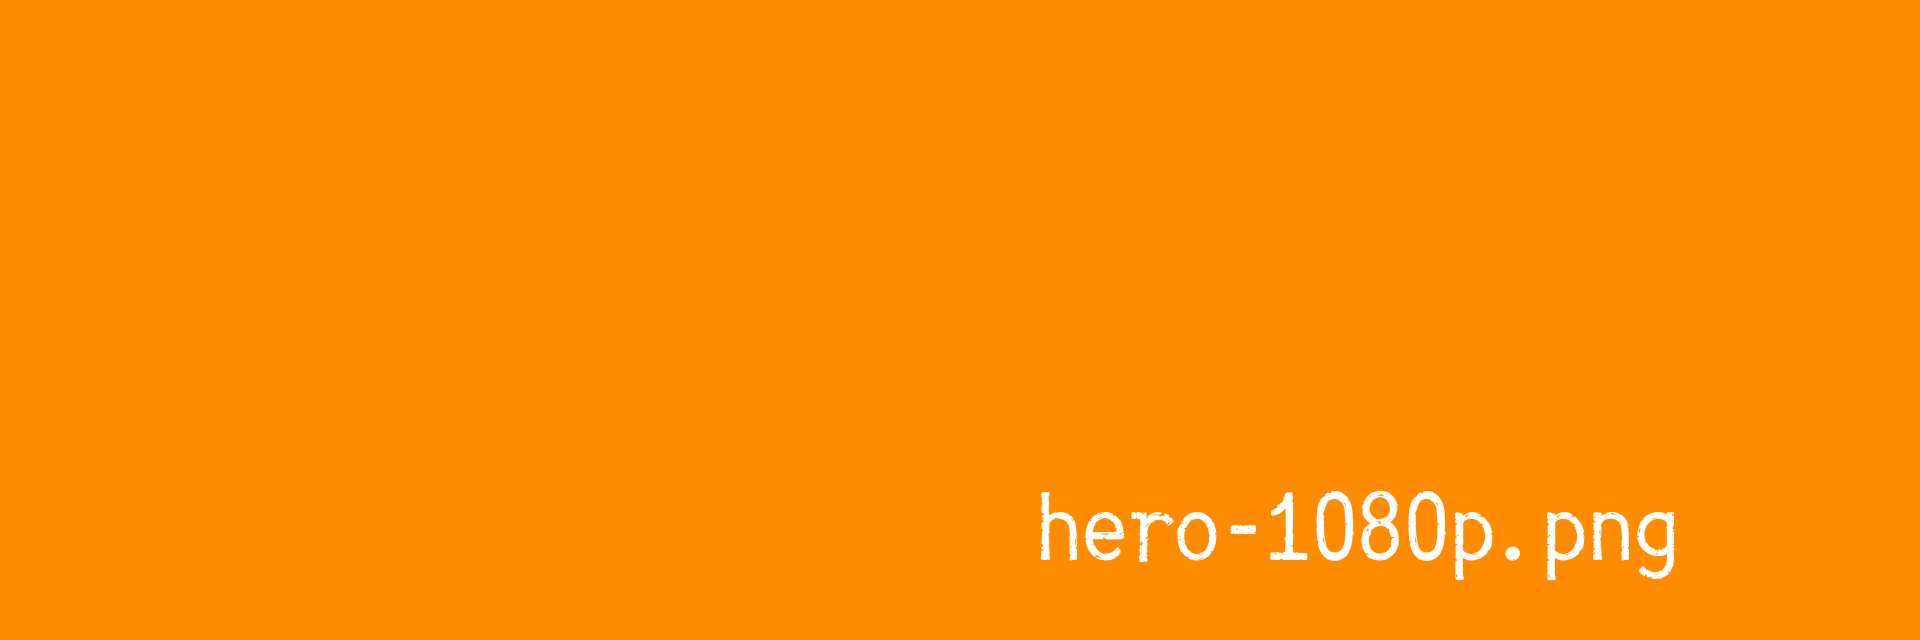

In [7]:
output_filename = 'hero-1080p.png'
output_path = f'./hero/{output_filename}'

draw_caption_render_and_save(w=1920, h=640,
    font_size=96,
    original_image_path='./original_1080p_1920x1080.png',
    output_path=output_path, output_filename=output_filename,
    manipulate_clone=lambda clone, w, h: clone.crop(left=0, top=0, right=w, bottom=h),
    text_coordinates=lambda w, h, text_width: (w - text_width - int(w/8), h - int(h/8)))

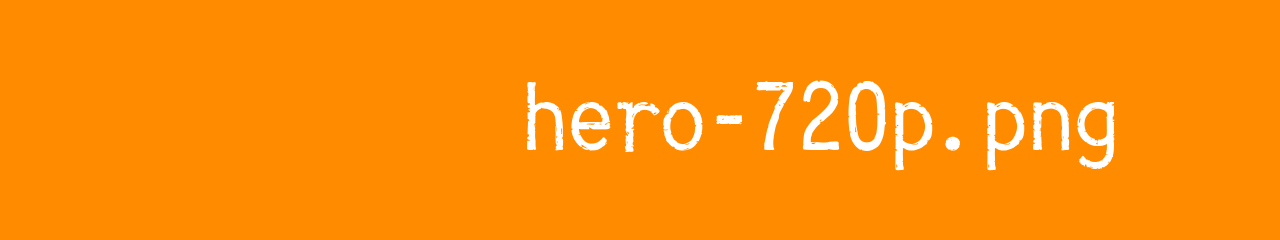

In [8]:
h_crop = 240
output_filename = 'hero-720p.png'
output_path = f'./hero/{output_filename}'

draw_caption_render_and_save(w=1280, h=720,
    font_size=96,
    original_image_path='./original_1080p_1920x1080.png',
    output_path=output_path, output_filename=output_filename,
    manipulate_clone=lambda clone, w, h: clone.crop(left=0, top=0, right=w, bottom=h_crop),
    text_coordinates=lambda w, h, text_width: (w - text_width - int(w/8), h_crop - int(h/8)))

## Portrait Hero Image Strategy

Another approach to the “hero” image is the intent to lay it out with text, suggesting that this image will be in a portrait orientation, flowing with, say, text. This would be the typical 20<sup>th</sup> magazine layout of the print era.

We start with a Full HD (1080p) image: `1920x1080`

From the starting image we generate the following with horizontal, rule-of-thirds dimensions:

| name | size | operation(s)
|- |- |-
| `hero-portrait-1080p` | `640x1080` | crop
| `hero-portrait-720p` | `427x720` | resize, crop

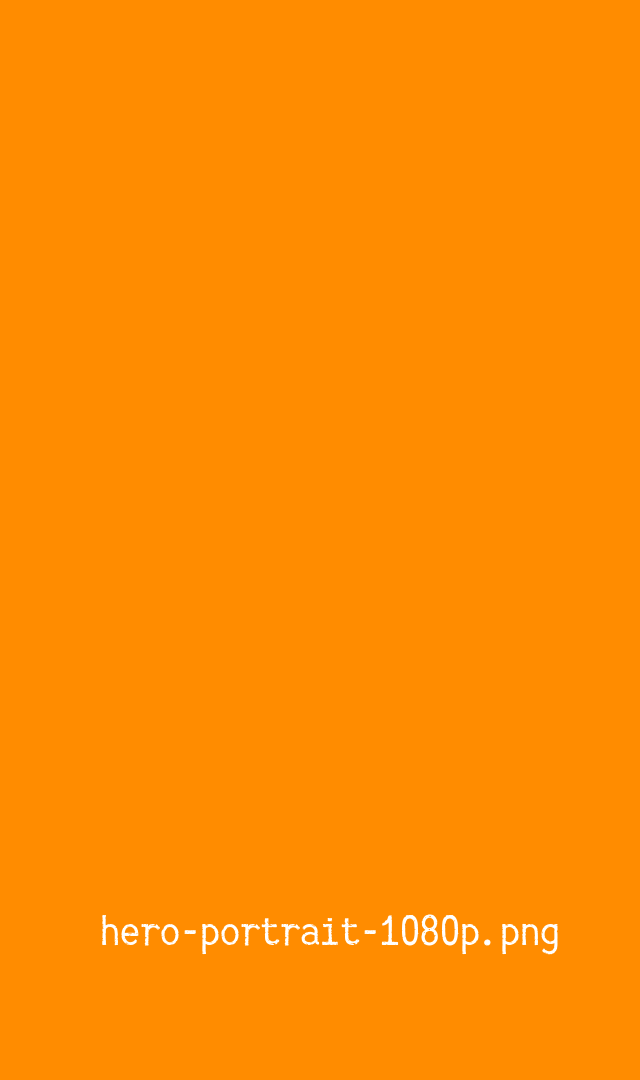

In [9]:
output_filename = 'hero-portrait-1080p.png'
output_path = f'./hero/{output_filename}'

draw_caption_render_and_save(w=640, h=1080,
    font_size=42,
    original_image_path='./original_1080p_1920x1080.png',
    output_path=output_path, output_filename=output_filename, output_width=640,
    manipulate_clone=lambda clone, w, h: clone.crop(left=0, top=0, right=w, bottom=h),
    text_coordinates=lambda w, h, text_width: (w - text_width - int(w/8), h - int(h/8)))

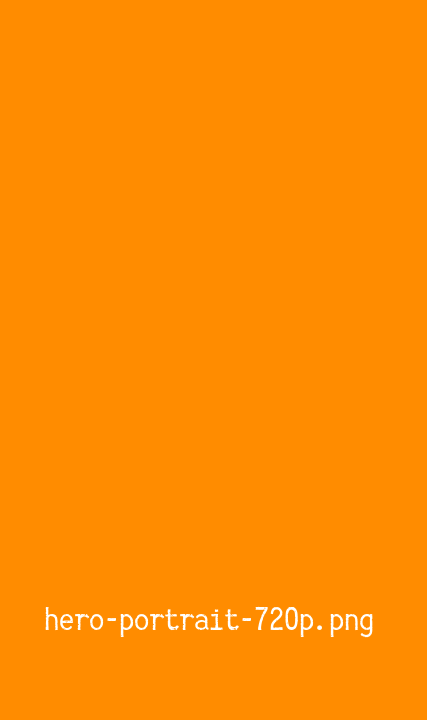

In [10]:
h_crop = 720
output_filename = 'hero-portrait-720p.png'
output_path = f'./hero/{output_filename}'

draw_caption_render_and_save(w=427, h=721,
    font_size=32,
    original_image_path='./original_1080p_1920x1080.png',
    output_path=output_path, output_filename=output_filename, output_width=427,
    manipulate_clone=lambda clone, w, _: clone.crop(left=0, top=0, right=w, bottom=h_crop),
    text_coordinates=lambda w, h, text_width: (w - text_width - int(w/8), h_crop - int(h/8)))

## Index Background Strategy

The Index Background Strategy is very similar to the Gallery Image Strategy except that  portrait orientation must be taken into account. We can do this by starting with two different originals. One is portrait (`1080x1920`), the other landscape (HD):

| original | name | size | operation
|- |- |- |-
| `1920x1080` | `index-720p` | `1280x720` | resize
| `1920x1080` | `index-sd` | `640x480` | crop 720p
| `1080x1920` | `index-720x1280` | `720x1280` | resize
| `1080x1920` | `index-480x640` | `480x640` | crop 720x1280


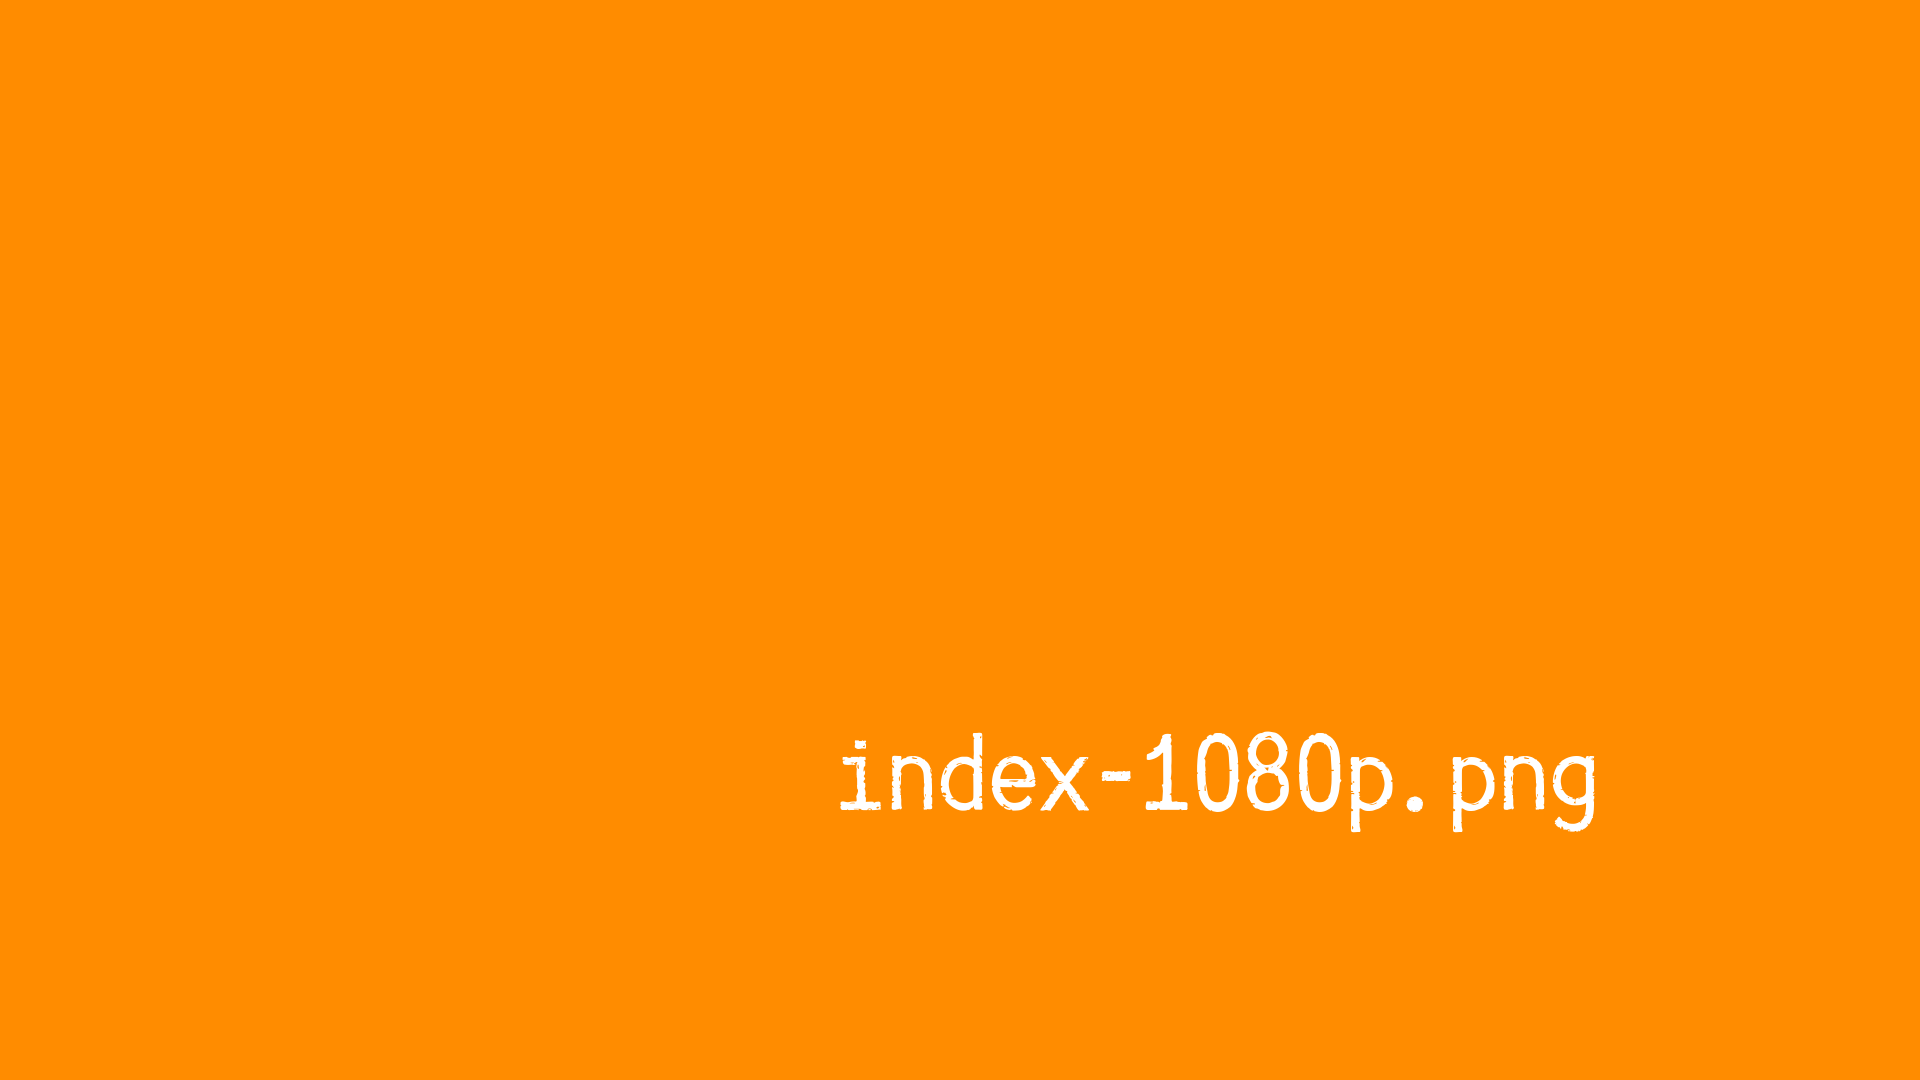

In [11]:
output_filename = 'index-1080p.png'
output_path = f'./index/{output_filename}'

draw_caption_render_and_save(w=1920, h=1080,
    font_size=108,
    original_image_path='./original_1080p_1920x1080.png',
    output_path=output_path, output_filename=output_filename,
    text_coordinates=lambda w, h, text_width: (w - text_width - int(w/6), h - int(h/4)))

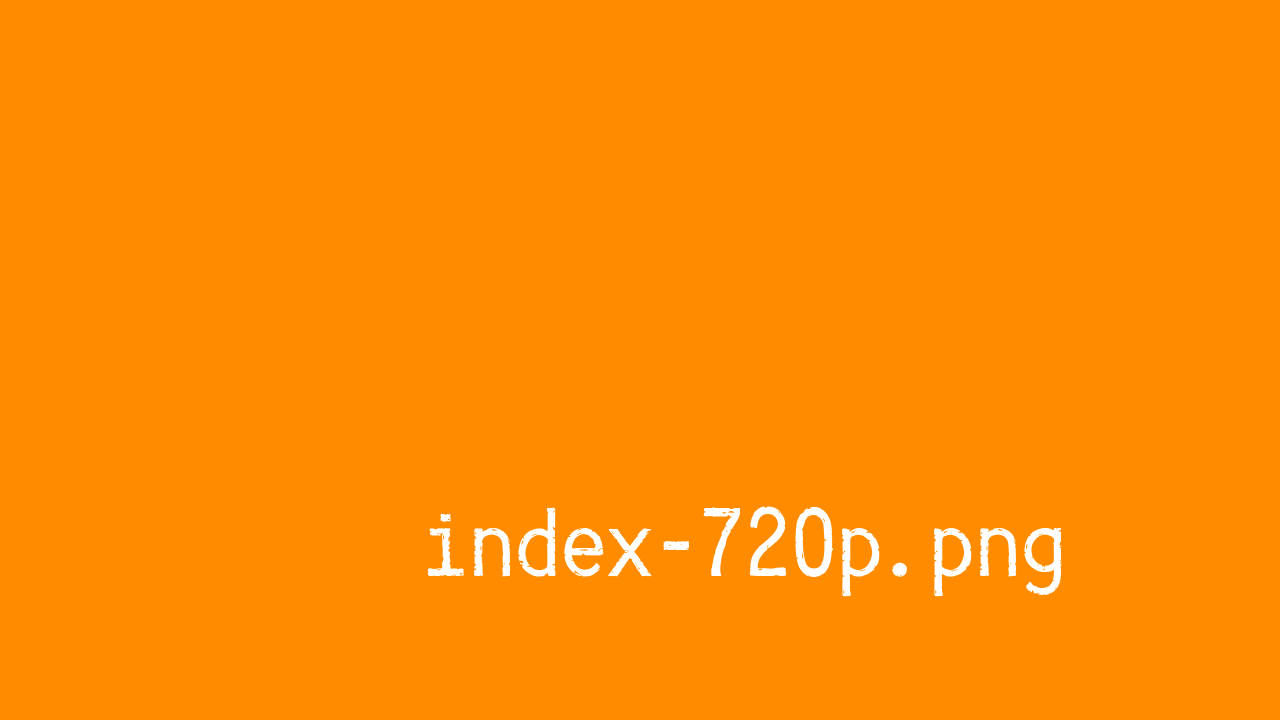

In [12]:
output_filename = 'index-720p.png'
output_path = f'./index/{output_filename}'

draw_caption_render_and_save(w=1280, h=720,
    font_size=96,
    original_image_path='./original_1080p_1920x1080.png',
    output_path=output_path, output_filename=output_filename,
    manipulate_clone=lambda clone, w, h: clone.resize(w, h),
    text_coordinates=lambda w, h, text_width: (w - text_width - int(w/6), h - int(h/5)))

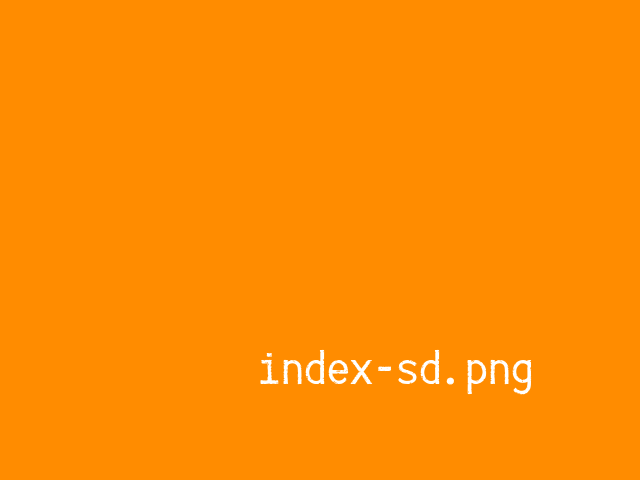

In [13]:
output_filename = 'index-sd.png'
output_path = f'./index/{output_filename}'

draw_caption_render_and_save(w=640, h=480,
    font_size=48,
    original_image_path='./index/index-720p.png',
    output_path=output_path, output_filename=output_filename, output_width=640,
    manipulate_clone=lambda clone, w, h: clone.crop(left=0, top=0, right=w, bottom=h),
    text_coordinates=lambda w, h, text_width: (w - text_width - int(w/6), h - int(h/5)))

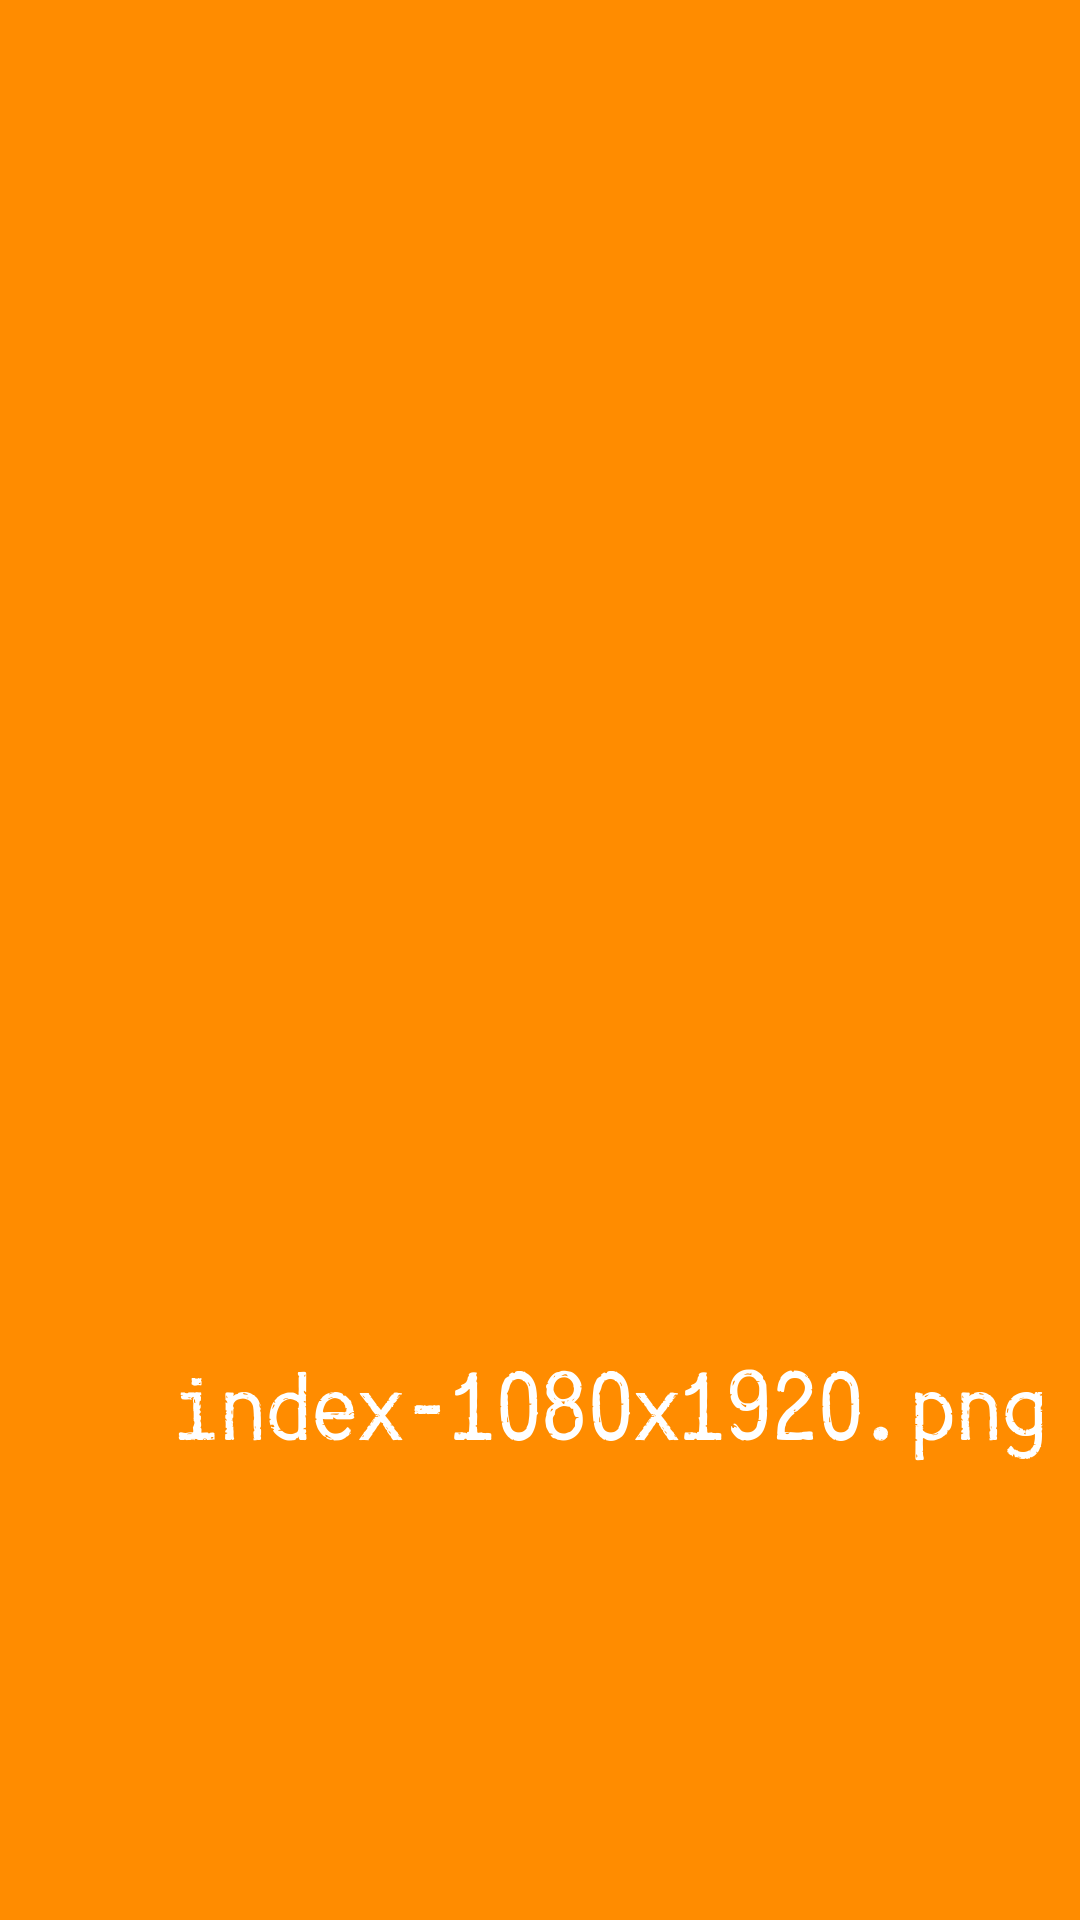

In [14]:
w, h = 1080, 1920
output_filename = f'index-{w}x{h}.png'
output_path = f'./index/{output_filename}'

draw_caption_render_and_save(w=w, h=h,
    font_size=96,
    original_image_path='./original_portrait_1080x1920.png',
    output_path=output_path, output_filename=output_filename,
    text_coordinates=lambda w, h, text_width: (w - text_width - 32, h - int(h/4)))

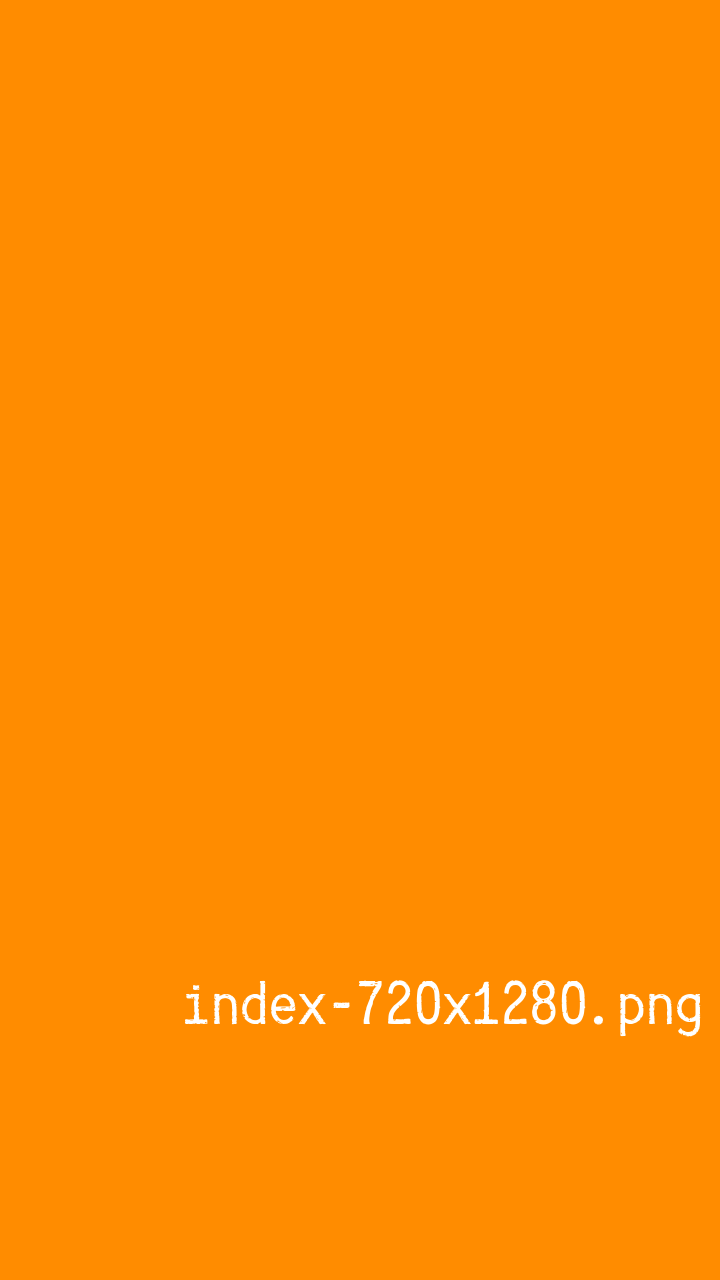

In [15]:
w, h = 720, 1280
output_filename = f'index-{w}x{h}.png'
output_path = f'./index/{output_filename}'

draw_caption_render_and_save(w=w, h=h,
    font_size=60,
    original_image_path='./original_portrait_1080x1920.png',
    output_path=output_path, output_filename=output_filename, output_width=w,
    manipulate_clone=lambda clone, w, h: clone.resize(w, h),
    text_coordinates=lambda w, h, text_width: (w - text_width - 16, h - int(h/5)))

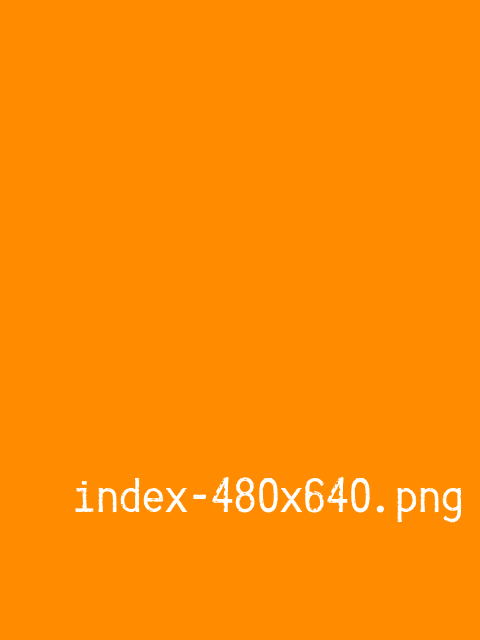

In [16]:
w, h = 480, 640
output_filename = f'index-{w}x{h}.png'
output_path = f'./index/{output_filename}'

draw_caption_render_and_save(w=w, h=h,
    font_size=48,
    original_image_path='./index/index-720x1280.png',
    output_path=output_path, output_filename=output_filename, output_width=w,
    manipulate_clone=lambda clone, w, h: clone.crop(left=0, top=0, right=w, bottom=h),
    text_coordinates=lambda w, h, text_width: (w - text_width - 16, h - int(h/5)))

## <!-- -->

[Bryan Wilhite is on LinkedIn](https://www.linkedin.com/in/wilhite)🇺🇸💼